# Sign Language Classification
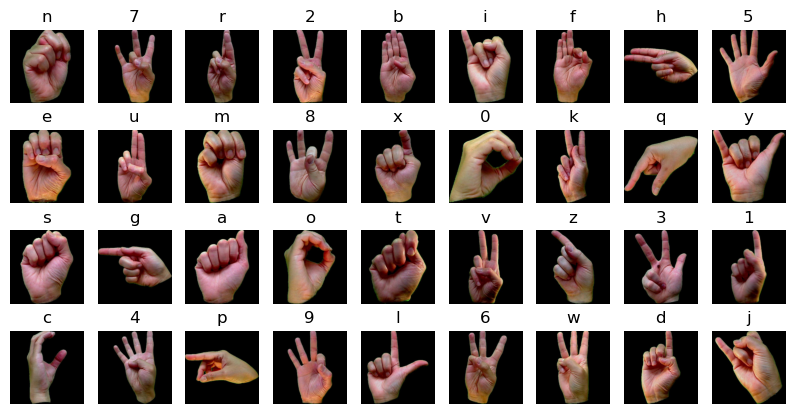

In [ ]:
import os
import cv2
import pickle
import numpy as np
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Conv2D, Flatten, Dense, AveragePooling2D

In [2]:
path = '/kaggle/input/asl-dataset/'
data,label = [],[]
for root, dirs, files in os.walk(path):
    key = os.path.basename(root)
    for file in files:
        full_file_path = os.path.join(root,file)
        img = cv2.imread(full_file_path)
        img = cv2.resize(img,(128,128))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        data.append(img)
        label.append(key)

data = np.array(data)
label = np.array(label)

In [3]:
x_train, x_test0, y_train, y_test0 = train_test_split(data, label, test_size=0.2)
x_test, x_val, y_test, y_val = train_test_split(x_test0, y_test0, test_size=0.5)

In [4]:
print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

print(x_test.shape)
print(y_test.shape)

(4024, 128, 128, 3)
(4024,)
(503, 128, 128, 3)
(503,)
(503, 128, 128, 3)
(503,)


In [5]:
# Normalization
x_train = x_train/255.0
x_val = x_val/255.0
x_test = x_test/255.0

In [6]:
#Encode labels from string to int
le = preprocessing.LabelEncoder()
labelEnc_train = le.fit_transform(y_train)
labelEnc_test = le.fit_transform(y_test)
labelEnc_val = le.fit_transform(y_val)

In [7]:
print(x_val.shape)
print(labelEnc_val.shape)

(503, 128, 128, 3)
(503,)


In [8]:
num_classes = 36

model = keras.Sequential()

model.add(Conv2D(32, (5,5), activation = 'relu', input_shape = (128,128,3)))
model.add(AveragePooling2D())

model.add(Conv2D(64, (5,5), activation = 'relu'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      2432      
                                                                 
 average_pooling2d (AverageP  (None, 62, 62, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 64)        51264     
                                                                 
 average_pooling2d_1 (Averag  (None, 29, 29, 64)       0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 53824)             0         
                                                                 
 dense (Dense)               (None, 128)               6

In [9]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [10]:
# Training the Neural Network
history = model.fit(x_train, labelEnc_train, validation_data=(x_val,labelEnc_val), epochs=8, batch_size=32)

Epoch 1/8
126/126 [==============================] - 12s 25ms/step - loss: 0.7332 - acc: 0.7977 - val_loss: 0.1069 - val_acc: 0.9702
Epoch 2/8
126/126 [==============================] - 2s 18ms/step - loss: 0.0747 - acc: 0.9776 - val_loss: 0.0747 - val_acc: 0.9801
Epoch 3/8
126/126 [==============================] - 2s 18ms/step - loss: 0.0230 - acc: 0.9928 - val_loss: 0.0827 - val_acc: 0.9702
Epoch 4/8
126/126 [==============================] - 2s 18ms/step - loss: 0.0311 - acc: 0.9896 - val_loss: 0.0379 - val_acc: 0.9940
Epoch 5/8
126/126 [==============================] - 2s 18ms/step - loss: 0.0559 - acc: 0.9858 - val_loss: 0.0768 - val_acc: 0.9821
Epoch 6/8
126/126 [==============================] - 2s 18ms/step - loss: 0.0156 - acc: 0.9968 - val_loss: 0.0843 - val_acc: 0.9861
Epoch 7/8
126/126 [==============================] - 2s 18ms/step - loss: 0.0240 - acc: 0.9953 - val_loss: 0.0341 - val_acc: 0.9980
Epoch 8/8
126/126 [==============================] - 2s 18ms/step - loss: 0

In [11]:
loss, accuracy = model.evaluate(x_test, labelEnc_test)
print('Test Accuracy =', accuracy)

16/16 [==============================] - 0s 7ms/step - loss: 0.0432 - acc: 0.9901
Test Accuracy = 0.9900596141815186


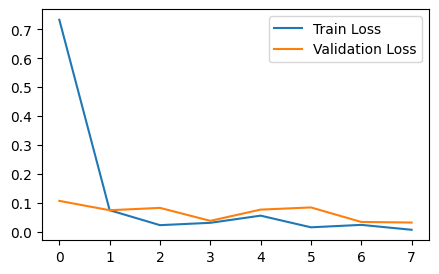

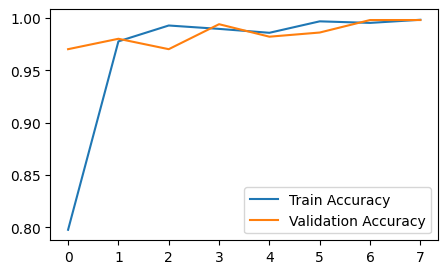

In [12]:
# Plot the loss value
plt.figure(figsize=(5,3))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plot the accuracy value
plt.figure(figsize=(5,3))
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.show()

In [13]:
# Classification Report
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)

print(classification_report(y_pred, labelEnc_test))

16/16 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        19
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00        16
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00        11
          13       1.00      1.00      1.00        16
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        16
          16       1.00     

Text(0.5, 1.0, 'Confusion Matrix')

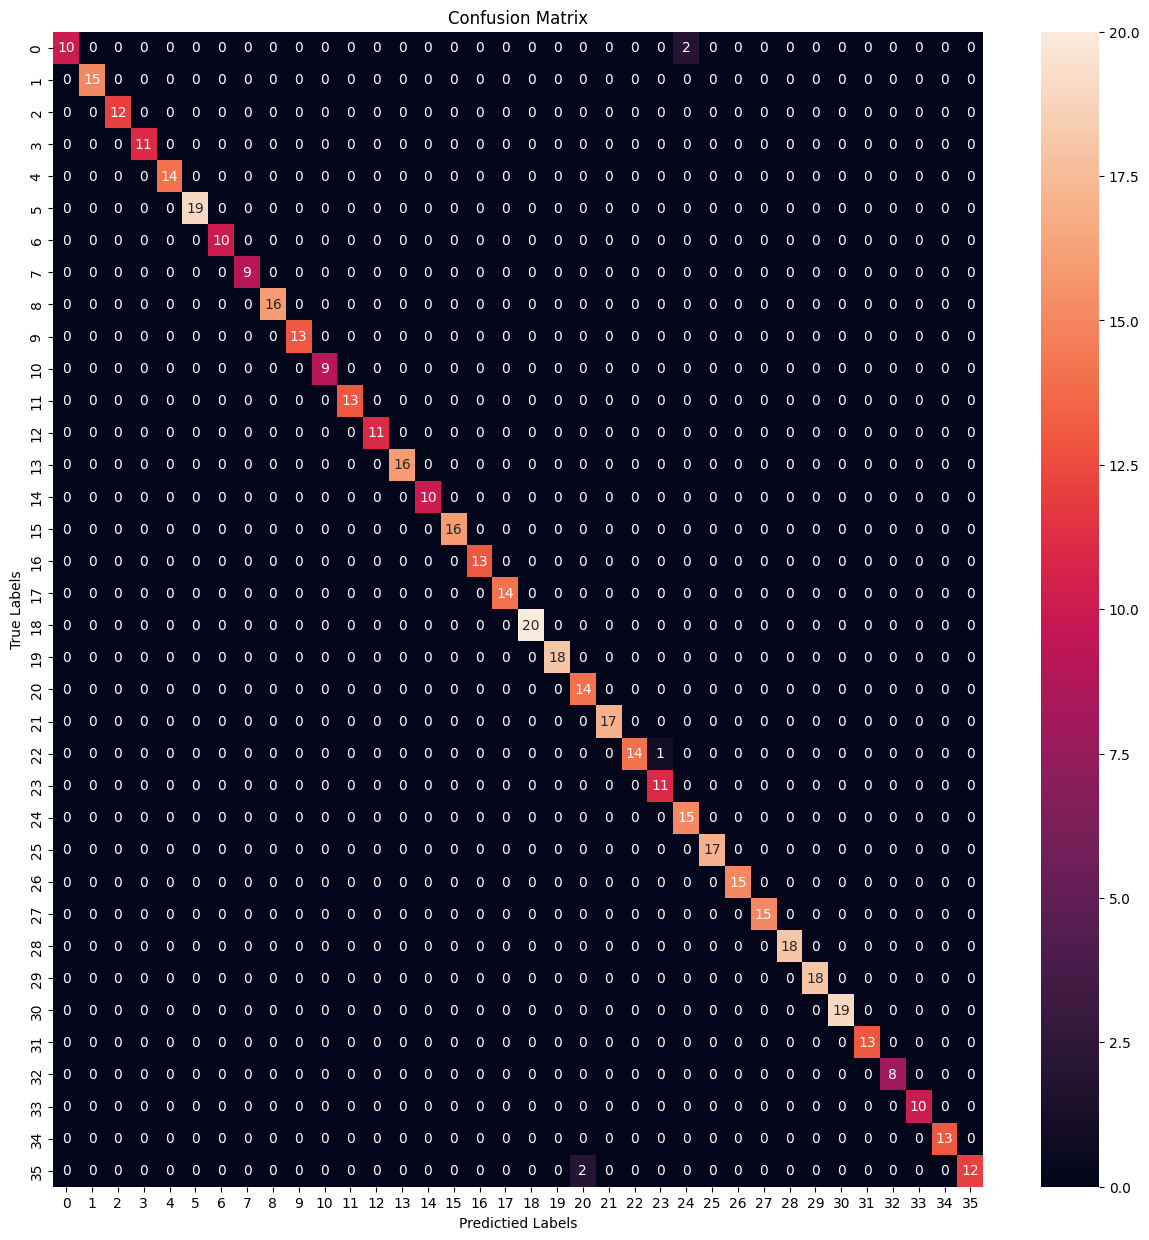

In [14]:
# Confusion Matrix
cmatrix = confusion_matrix(y_pred, labelEnc_test)
fig, ax = plt.subplots(figsize=(15, 15))
sn.heatmap(cmatrix,annot=True,fmt='g',ax=ax)
ax.set_xlabel('Predictied Labels');ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix')

In [15]:
model.save("model.h5")

In [16]:
mod = tf.keras.models.load_model('model.h5')

1/1 [==============================] - 0s 125ms/step
The Prediction For This Image = 12
The Actual Prediction For This Image = 12


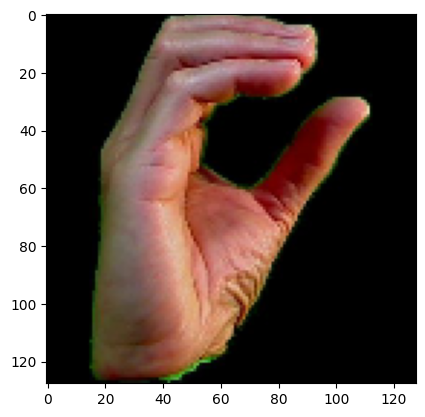

In [17]:
idx = np.random.randint(0,x_test.shape[0])
pic = x_test[idx]
Ipic = np.expand_dims(pic,axis=0)
IFpic = mod.predict(Ipic)
predictions = np.argmax(IFpic)
print("The Prediction For This Image =",predictions)
print("The Actual Prediction For This Image =",labelEnc_test[idx])
fig,ax = plt.subplots()
ax.imshow(pic)
plt.imshow(pic)

In [ ]:
!pip install gradio

In [19]:
labels = np.unique(y_train)
labels

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c',
       'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
       'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'], dtype='<U1')

In [20]:
def predict_input_image(img):
    image = img.reshape(-1,128,128,3)
    prediction = mod.predict(image)[0]
    confidences = {labels[i]: float(prediction[i]) for i in range(36)}
    return confidences

In [25]:
import gradio as gr
image = gr.inputs.Image(shape=(128,128))
label = gr.outputs.Label(num_top_classes=3)
gr.Interface(fn=predict_input_image, inputs=image, outputs=label,
             interpretation='default', title = "Sign Language Classification",
             examples=["/kaggle/input/asl-dataset/asl_dataset/6/hand1_6_bot_seg_4_cropped.jpeg",
                       "/kaggle/input/asl-dataset/asl_dataset/n/hand1_n_bot_seg_4_cropped.jpeg"]).launch(debug='True')

/opt/conda/lib/python3.10/site-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/opt/conda/lib/python3.10/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Kaggle notebooks require sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://a156a901d4bc0e98f2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


1/1 [==============================] - 0s 22ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://a156a901d4bc0e98f2.gradio.live


In [ ]:
# cm = confusion_matrix(y_pred, labelEnc_test)
# plt.figure(figsize = (25, 25))
# sn.heatmap(cm, annot = True)

In [ ]:
# results=pd.DataFrame({'Model':['DNN','RNN (LSTM)','CNN'],
#                      'Accuracy Score':[score1[1],score2[1],score3[1]]})
# result_df=results.sort_values(by='Accuracy Score', ascending=False)
# result_df=result_df.set_index('Model')
# result_df